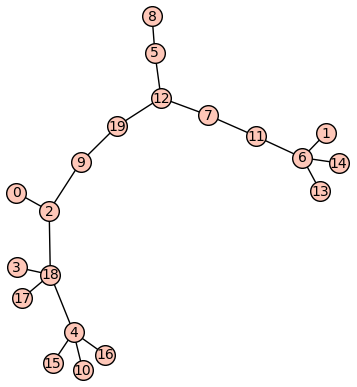

2.0

In [32]:
def random_drevo(m): #vrne random drevo z m vozlišči
    drevo = graphs.RandomTree(m)
    return drevo

G = random_drevo(20)
G.show()

def najkrajsa_razdalja(G, st_centrov):
    K = st_centrov
    razdalje = G.distance_all_pairs()

    p = MixedIntegerLinearProgram(maximization=False)
    x = p.new_variable(binary=True) #x_uv = 1 če mesto u spada k skladišču v (mestu v s skladiščem)
    y = p.new_variable(binary=True) # y_v = 1 če je v mestu v skladišče

    p.set_objective(p['R']) # največja razdalja je spremenljivka

    for u in G:
        p.add_constraint(sum(x[u, v] for v in G) == 1) #za vsako mesto u bo veljalo, da spada pod neko območje mesta v s skladiščem

    p.add_constraint(sum(y[v] for v in G) == K) #vsota skladišč je enaka K

    for u in G:
        for v in G:
            p.add_constraint(x[u, v] <= y[v]) #ne sme se zgoditi, da mesto u pade v območje mesta v, v mestu v pa sploh ni skladišča

    for u in G:
        for v in G:
            if v in razdalje[u]:
                p.add_constraint(razdalje[u][v] * x[u, v] <= p['R']) # če sta vozlišči v isti povezani komponenti, potem omejimo največjo razdaljo                                                                        do skladišča
            else:
                p.add_constraint(x[u, v] == 0) # sicer mesto u ne more pripadati skladišču v
    max_razdalja = p.solve()
    skladisca = [k for k, v in p.get_values(y).items() if v == 1]
    #print(skladisca)
    return round(max_razdalja

najkrajsa_razdalja(G,5)


In [29]:
import time
#čas izvajanja v odvisnosti od k
def cas_izvajanja_k(m,k):
    G = random_drevo(m)
    #G.show()
    seznam_casov = []
    for i in range(1,k+1):
        zacetni = time.time()
        najkrajsa_razdalja(G,i)
        koncni = time.time() - zacetni
        seznam_casov.append((koncni))
    return seznam_casov

#vrne povprečne čase(od n ponovitev) za različne k
#FIKSNO: velikost drevesa
#SPREMINJAMO: k
def cas_izvajanja_za_vec_ponovitev(m,max_stevilo_centrov,stevilo_ponovitev):
    seznam = []
    for i in range(0, stevilo_ponovitev):
        casi = cas_izvajanja_k(m,max_stevilo_centrov)
        seznam.append(casi)

    for i in range(len(seznam)):
        while len(seznam[i]) < max_stevilo_centrov:
            seznam[i] = [None] + seznam[i]

    povprecja = []
    for j in range(max_stevilo_centrov):
        vsota = 0
        stevec = 0
        for i in range(stevilo_ponovitev):
            if seznam[i][j] != None:
                vsota += seznam[i][j]
                stevec += 1
        if stevec == 0:
            povprecja.append(None)
        else:
            povprecja.append(vsota/stevec)

    return povprecja

cas_izvajanja_za_vec_ponovitev(10,10,5)


[0.0166656494140625,
 0.0414736270904541,
 0.055849981307983396,
 0.06085367202758789,
 0.0660778522491455,
 0.06434259414672852,
 0.06455349922180176,
 0.06590580940246582,
 0.06621603965759278,
 0.009547901153564454]

In [33]:
#kako se optimalna vrednost spreminja glede na k
def opt_vrednost_k(m,k):
    G = random_drevo(m)
    seznam_vrednosti = []
    for i in range(1,k+1):
        razdalja = round(najkrajsa_razdalja(G, i)) #round za zaokrževanje števil
        seznam_vrednosti.append((razdalja))
    return seznam_vrednosti

#vrne optimalno vrednost R za več ponovitev
#FIKSNO: velikost drevesa
#SPREMINJAVA: k(max_stevilo_centrov)
def opt_vrednost_za_vec_ponovitev(m,max_stevilo_centrov,stevilo_ponovitev):
    seznam = []
    for i in range(0, stevilo_ponovitev):
        #G = random_drevo(m)
        razdalje = opt_vrednost_k(m,max_stevilo_centrov)
        seznam.append(razdalje)

    for i in range(len(seznam)):
        while len(seznam[i]) < max_stevilo_centrov:
            seznam[i] = [None] + seznam[i]

    povprecja = []
    for j in range(max_stevilo_centrov):
        vsota = 0
        stevec = 0
        for i in range(stevilo_ponovitev):
            if seznam[i][j] != None:
                vsota += seznam[i][j]
                stevec += 1
        if stevec == 0:
            povprecja.append(None)
        else:
            povprecja.append(vsota/stevec)

    return povprecja

opt_vrednost_za_vec_ponovitev(10,10,5)

[3.8, 2.0, 1.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]